In [29]:
import requests
from urllib.parse import quote, urlencode, quote_plus
import pandas as pd
from bs4 import BeautifulSoup

In [30]:
key_fd = open('./data/covid.txt', mode='r')
covid_key = key_fd.read(100)
key_fd.close()

In [31]:
start_date = '20200318'
end_date = '20200318'

In [32]:
corona_url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson'
url = f'{corona_url}?ServiceKey={covid_key}&pageNo=1&numOfRows=10&startCreateDt={start_date}&endCreateDt={end_date}'

In [33]:
result = requests.get(url)
soup = BeautifulSoup(result.text, 'xml')

#### 우선 연습으로 3/18 데이터 뽑아보기 - append

In [40]:
corona_url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson'
url = f'{corona_url}?ServiceKey={covid_key}&pageNo=1&numOfRows=10&startCreateDt=20200318&endCreateDt=20200318'

create_date = []; def_list = []; gubun_list = []; incdec_list = []; isolClearCnt_list = []
qurRate_list = []; stdDay_list = []; isolingcnt_list=[]; local_list=[]; overflow_list = []

items = soup.find_all('item')

for i in range(len(items)):
    create_date.append(items[i].find('createDt').get_text()) # 등록시간
    def_list.append(items[i].find('defCnt').get_text()) # 누적확진자수
    gubun_list.append(items[i].find('gubun').get_text()) # 시도, 검역
    incdec_list.append(items[i].find('incDec').get_text()) # 전일대비 증감수
    isolClearCnt_list.append(items[i].find('isolClearCnt').get_text()) # 격리해제
    qurRate_list.append(items[i].find('qurRate').get_text()) #10만명당 발생수
    stdDay_list.append(items[i].find('stdDay').get_text()) # 기준일시
    isolingcnt_list.append(items[i].find('isolIngCnt').get_text()) # 격리중
    local_list.append(items[i].find('localOccCnt').get_text()) # 국내발생
    overflow_list.append(items[i].find('overFlowCnt').get_text()) # 해외발생

In [41]:
df = pd.DataFrame({
    '등록시간' : create_date,
    '지역' : gubun_list,
    '누적확진자' : def_list,
    '전일대비 증감' : incdec_list,
    '격리해제' : isolClearCnt_list,
    '격리중' : isolingcnt_list,
    '10만명당 발생수': qurRate_list,
    '국내발생' : local_list,
    '해외발생' : overflow_list,
    '기준일시': stdDay_list
})
df

,등록시간,지역,누적확진자,전일대비 증감,격리해제,격리중,10만명당 발생수,국내발생,해외발생,기준일시


#### for문 돌려보기 (3일정도로 연습)

In [8]:
import datetime

In [9]:
start_date = '20201018'
end_date = '20201020'

In [10]:
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

print((end_date-start_date).days)

2


In [11]:
a = (end_date - datetime.timedelta(days=1)).strftime("%Y-%m-%d")
a

'2020-10-19'

In [12]:
range((end_date-start_date).days+1)

range(0, 3)

In [14]:
"""dict_list = []

corona_url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson'
url = f'{corona_url}?ServiceKey={covid_key}&pageNo=1&numOfRows=10&startCreateDt={start_date}&endCreateDt={end_date}'
result = requests.get(url)
soup = BeautifulSoup(result.text, 'xml')
for i in range((end_date-start_date).days+1):
    date = (end_date - datetime.timedelta(days=i)).strftime("%Y-%m-%d")
    a_dict = {'일자':date, '서울':0, '부산':0, '대구':0, '인천': 0, '광주':0, '대전':0, '울산':0, '세종': 0, '강원':0, '충북':0, '충남':0, '전북': 0, '전남':0, '경북':0, '경남':0, '제주': 0, '검역': 0}
    new_date = (end_date - datetime.timedelta(days=i)).strftime("%Y%m%d")
    corona_url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson'
    url = f'{corona_url}?ServiceKey={covid_key}&pageNo=1&numOfRows=10&startCreateDt={new_date}&endCreateDt={new_date}'
    result = requests.get(url)
    soup = BeautifulSoup(result.text, 'xml')
    items = soup.find_all('item')
    for k in range(len(items)):
        area = items[k].find('gubun').get_text()
        num = items[k].find('incDec').get_text()
        a_dict[area] = num
    dict_list.append(a_dict)
    print(a_dict)"""

'dict_list = []\n\ncorona_url = \'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson\'\nurl = f\'{corona_url}?ServiceKey={covid_key}&pageNo=1&numOfRows=10&startCreateDt={start_date}&endCreateDt={end_date}\'\nresult = requests.get(url)\nsoup = BeautifulSoup(result.text, \'xml\')\nfor i in range((end_date-start_date).days+1):\n    date = (end_date - datetime.timedelta(days=i)).strftime("%Y-%m-%d")\n    a_dict = {\'일자\':date, \'서울\':0, \'부산\':0, \'대구\':0, \'인천\': 0, \'광주\':0, \'대전\':0, \'울산\':0, \'세종\': 0, \'강원\':0, \'충북\':0, \'충남\':0, \'전북\': 0, \'전남\':0, \'경북\':0, \'경남\':0, \'제주\': 0, \'검역\': 0}\n    new_date = (end_date - datetime.timedelta(days=i)).strftime("%Y%m%d")\n    corona_url = \'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson\'\n    url = f\'{corona_url}?ServiceKey={covid_key}&pageNo=1&numOfRows=10&startCreateDt={new_date}&endCreateDt={new_date}\'\n    result = requests.get(url)\n    soup = BeautifulSoup(result.t

In [15]:
"""ex=pd.DataFrame(dict_list)
ex"""

'ex=pd.DataFrame(dict_list)\nex'

#### for문 제대로 돌리기

In [16]:
from tqdm.notebook import tqdm

In [17]:
start_date = '20200301'
end_date = '20201130'

In [18]:
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

print((end_date-start_date).days)

274


In [19]:
start_date

Timestamp('2020-03-01 00:00:00')

In [20]:
dict_list = []

corona_url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson'
url = f'{corona_url}?ServiceKey={covid_key}&pageNo=1&numOfRows=10&startCreateDt={start_date}&endCreateDt={end_date}'
result = requests.get(url)
soup = BeautifulSoup(result.text, 'xml')
for i in tqdm(range((end_date-start_date).days+1)):
    date = (end_date - datetime.timedelta(days=i)).strftime("%Y-%m-%d")
    a_dict = {'일자':date, '서울':0, '부산':0, '대구':0, '인천': 0, '광주':0, '대전':0, '울산':0, '세종': 0, '강원':0, '충북':0, '충남':0, '전북': 0, '전남':0, '경북':0, '경남':0, '제주': 0, '검역': 0}
    new_date = (end_date - datetime.timedelta(days=i)).strftime("%Y%m%d")
    corona_url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson'
    url = f'{corona_url}?ServiceKey={covid_key}&pageNo=1&numOfRows=10&startCreateDt={new_date}&endCreateDt={new_date}'
    result = requests.get(url)
    soup = BeautifulSoup(result.text, 'xml')
    items = soup.find_all('item')
    for k in range(len(items)):
        area = items[k].find('gubun').get_text()
        num = items[k].find('incDec').get_text()
        a_dict[area] = num
    dict_list.append(a_dict)

In [21]:
corona = pd.DataFrame(dict_list)
corona.head()

,일자,서울,부산,대구,인천,광주,대전,울산,세종,강원,충북,충남,전북,전남,경북,경남,제주,검역,경기,합계
0,2020-11-30,159,52,4,34,13,5,3,1,8,22,5,16,4,4,20,1,10,77,438
1,2020-11-29,150,22,3,22,8,6,0,3,19,23,13,17,19,11,15,1,17,101,450
2,2020-11-28,178,28,1,25,16,13,3,0,33,24,17,9,7,5,14,2,3,126,504
3,2020-11-27,204,24,0,25,13,5,7,3,9,20,31,24,11,3,39,3,31,117,569
4,2020-11-26,213,22,1,19,14,1,7,4,8,8,16,16,9,2,45,3,12,183,583


In [22]:
corona.to_csv('./data/전국 시도별 코로나 현황.csv', sep=',', encoding='utf8')

In [23]:
corona = corona.fillna(0)
corona.tail()

,일자,서울,부산,대구,인천,광주,대전,울산,세종,강원,충북,충남,전북,전남,경북,경남,제주,검역,경기,합계
270,2020-03-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
271,2020-03-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
272,2020-03-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
273,2020-03-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
274,2020-03-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
corona['일자'] = pd.to_datetime(corona['일자'])
corona.head()

,일자,서울,부산,대구,인천,광주,대전,울산,세종,강원,충북,충남,전북,전남,경북,경남,제주,검역,경기,합계
0,2020-11-30,159,52,4,34,13,5,3,1,8,22,5,16,4,4,20,1,10,77,438
1,2020-11-29,150,22,3,22,8,6,0,3,19,23,13,17,19,11,15,1,17,101,450
2,2020-11-28,178,28,1,25,16,13,3,0,33,24,17,9,7,5,14,2,3,126,504
3,2020-11-27,204,24,0,25,13,5,7,3,9,20,31,24,11,3,39,3,31,117,569
4,2020-11-26,213,22,1,19,14,1,7,4,8,8,16,16,9,2,45,3,12,183,583


In [25]:
corona = corona.set_index(corona['일자'])
del corona['일자']
corona.head()

,서울,부산,대구,인천,광주,대전,울산,세종,강원,충북,충남,전북,전남,경북,경남,제주,검역,경기,합계
일자,,,,,,,,,,,,,,,,,,,
2020-11-30,159,52,4,34,13,5,3,1,8,22,5,16,4,4,20,1,10,77,438
2020-11-29,150,22,3,22,8,6,0,3,19,23,13,17,19,11,15,1,17,101,450
2020-11-28,178,28,1,25,16,13,3,0,33,24,17,9,7,5,14,2,3,126,504
2020-11-27,204,24,0,25,13,5,7,3,9,20,31,24,11,3,39,3,31,117,569
2020-11-26,213,22,1,19,14,1,7,4,8,8,16,16,9,2,45,3,12,183,583


In [26]:
# 검역 없애기
del corona['검역']
corona.head()

,서울,부산,대구,인천,광주,대전,울산,세종,강원,충북,충남,전북,전남,경북,경남,제주,경기,합계
일자,,,,,,,,,,,,,,,,,,
2020-11-30,159,52,4,34,13,5,3,1,8,22,5,16,4,4,20,1,77,438
2020-11-29,150,22,3,22,8,6,0,3,19,23,13,17,19,11,15,1,101,450
2020-11-28,178,28,1,25,16,13,3,0,33,24,17,9,7,5,14,2,126,504
2020-11-27,204,24,0,25,13,5,7,3,9,20,31,24,11,3,39,3,117,569
2020-11-26,213,22,1,19,14,1,7,4,8,8,16,16,9,2,45,3,183,583


In [27]:
coron_sumX = corona.copy()
del coron_sumX['합계']
coron_sumX.head()

,서울,부산,대구,인천,광주,대전,울산,세종,강원,충북,충남,전북,전남,경북,경남,제주,경기
일자,,,,,,,,,,,,,,,,,
2020-11-30,159,52,4,34,13,5,3,1,8,22,5,16,4,4,20,1,77
2020-11-29,150,22,3,22,8,6,0,3,19,23,13,17,19,11,15,1,101
2020-11-28,178,28,1,25,16,13,3,0,33,24,17,9,7,5,14,2,126
2020-11-27,204,24,0,25,13,5,7,3,9,20,31,24,11,3,39,3,117
2020-11-26,213,22,1,19,14,1,7,4,8,8,16,16,9,2,45,3,183


In [28]:
coron_sumX = coron_sumX.astype(int)
coron_sumX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 275 entries, 2020-11-30 to 2020-03-01
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   서울      275 non-null    int32
 1   부산      275 non-null    int32
 2   대구      275 non-null    int32
 3   인천      275 non-null    int32
 4   광주      275 non-null    int32
 5   대전      275 non-null    int32
 6   울산      275 non-null    int32
 7   세종      275 non-null    int32
 8   강원      275 non-null    int32
 9   충북      275 non-null    int32
 10  충남      275 non-null    int32
 11  전북      275 non-null    int32
 12  전남      275 non-null    int32
 13  경북      275 non-null    int32
 14  경남      275 non-null    int32
 15  제주      275 non-null    int32
 16  경기      275 non-null    int32
dtypes: int32(17)
memory usage: 20.4 KB


In [29]:
corona = corona.astype(int)
corona.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 275 entries, 2020-11-30 to 2020-03-01
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   서울      275 non-null    int32
 1   부산      275 non-null    int32
 2   대구      275 non-null    int32
 3   인천      275 non-null    int32
 4   광주      275 non-null    int32
 5   대전      275 non-null    int32
 6   울산      275 non-null    int32
 7   세종      275 non-null    int32
 8   강원      275 non-null    int32
 9   충북      275 non-null    int32
 10  충남      275 non-null    int32
 11  전북      275 non-null    int32
 12  전남      275 non-null    int32
 13  경북      275 non-null    int32
 14  경남      275 non-null    int32
 15  제주      275 non-null    int32
 16  경기      275 non-null    int32
 17  합계      275 non-null    int32
dtypes: int32(18)
memory usage: 21.5 KB


In [30]:
# 코로나 월별 데이터로 만들기
corona_month = corona.resample('M').sum()
corona_month

,서울,부산,대구,인천,광주,대전,울산,세종,강원,충북,충남,전북,전남,경북,경남,제주,경기,합계
일자,,,,,,,,,,,,,,,,,,
2020-03-31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-04-30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-05-31,98,1,6,51,0,5,3,1,3,7,1,1,1,11,5,1,87,308
2020-06-30,252,4,13,72,4,38,3,0,4,2,15,3,3,7,5,4,217,744
2020-07-31,275,17,31,42,138,48,4,0,9,9,20,12,14,12,25,7,329,1452
2020-08-31,2267,130,107,335,170,90,30,17,115,55,142,48,104,54,77,19,1714,5642
2020-09-30,1424,120,85,200,121,105,58,9,35,43,152,41,27,96,55,14,1123,3865
2020-10-31,719,171,42,129,16,82,16,6,55,18,57,38,16,36,25,0,1019,2713
2020-11-30,2794,217,58,366,185,52,35,18,373,139,358,168,238,117,309,21,1882,7769


In [31]:
corona_month.index = ['3월','4월','5월','6월','7월','8월','9월','10월','11월']
corona_month

,서울,부산,대구,인천,광주,대전,울산,세종,강원,충북,충남,전북,전남,경북,경남,제주,경기,합계
3월,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4월,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5월,98,1,6,51,0,5,3,1,3,7,1,1,1,11,5,1,87,308
6월,252,4,13,72,4,38,3,0,4,2,15,3,3,7,5,4,217,744
7월,275,17,31,42,138,48,4,0,9,9,20,12,14,12,25,7,329,1452
8월,2267,130,107,335,170,90,30,17,115,55,142,48,104,54,77,19,1714,5642
9월,1424,120,85,200,121,105,58,9,35,43,152,41,27,96,55,14,1123,3865
10월,719,171,42,129,16,82,16,6,55,18,57,38,16,36,25,0,1019,2713
11월,2794,217,58,366,185,52,35,18,373,139,358,168,238,117,309,21,1882,7769


In [32]:
# 인덱스를 지역별로 바꾸기
corona_moT = corona_month.T
corona_moT

,3월,4월,5월,6월,7월,8월,9월,10월,11월
서울,0,0,98,252,275,2267,1424,719,2794
부산,0,0,1,4,17,130,120,171,217
대구,0,0,6,13,31,107,85,42,58
인천,0,0,51,72,42,335,200,129,366
광주,0,0,0,4,138,170,121,16,185
대전,0,0,5,38,48,90,105,82,52
울산,0,0,3,3,4,30,58,16,35
세종,0,0,1,0,0,17,9,6,18
강원,0,0,3,4,9,115,35,55,373
충북,0,0,7,2,9,55,43,18,139


In [33]:
corona_moT['합계'] = corona_moT.sum(axis=1)
corona_moT.head()

,3월,4월,5월,6월,7월,8월,9월,10월,11월,합계
서울,0,0,98,252,275,2267,1424,719,2794,7829
부산,0,0,1,4,17,130,120,171,217,660
대구,0,0,6,13,31,107,85,42,58,342
인천,0,0,51,72,42,335,200,129,366,1195
광주,0,0,0,4,138,170,121,16,185,634


### 시각화-1. 그래프로 시각화하기

In [34]:
import platform
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

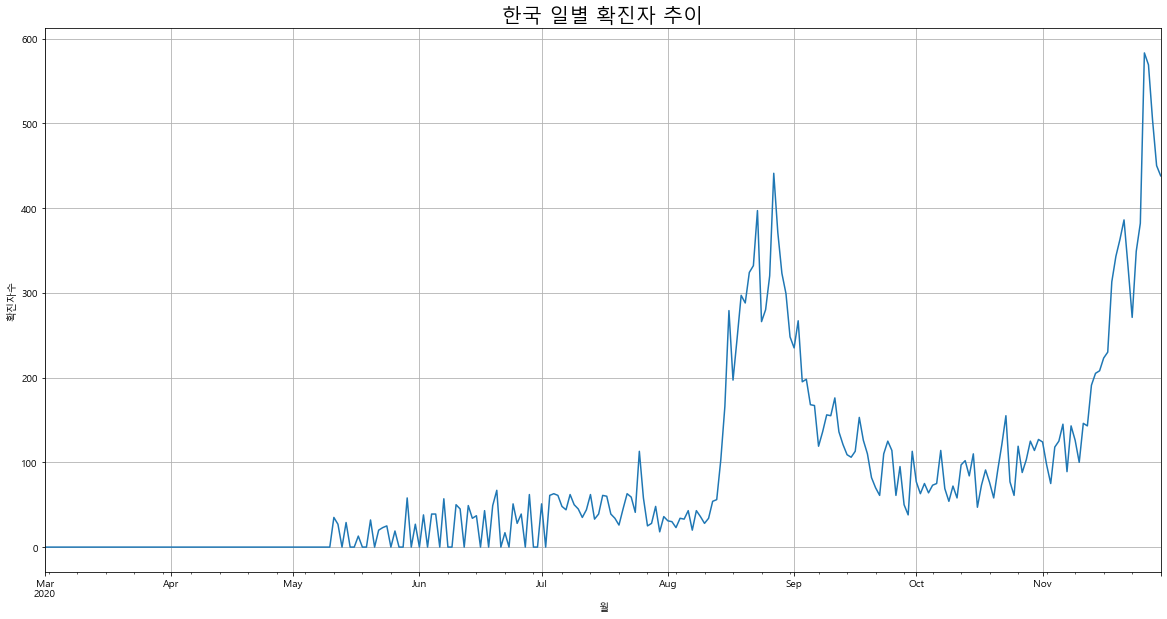

In [35]:
## 일자별 확진자 추이
corona['합계'].plot(grid=True, figsize=(20,10))
plt.title('한국 일별 확진자 추이', fontsize=20)
plt.xlabel('월')
plt.ylabel('확진자수')
plt.show()

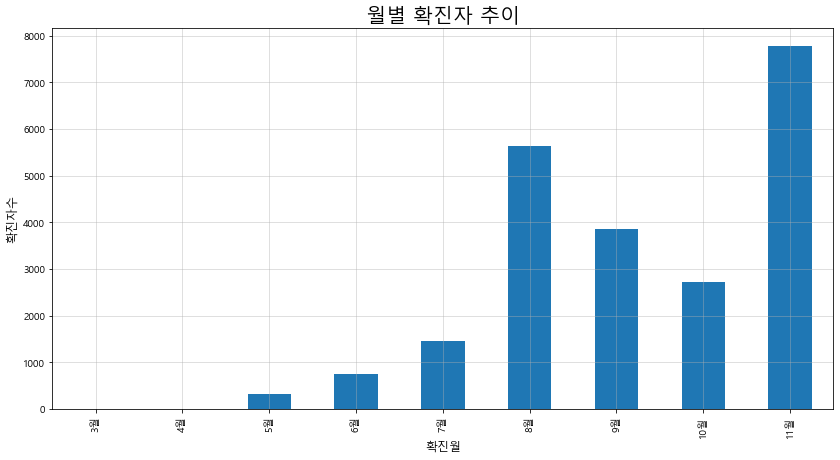

In [36]:
# 월별 확진자 추이
corona_month['합계'].plot(kind='bar', figsize=(14,7))
plt.xlabel('확진월', fontsize=12)
plt.ylabel('확진자수', fontsize=12)
plt.title('월별 확진자 추이', fontsize=20)
plt.grid(True, alpha=0.5)
plt.show()

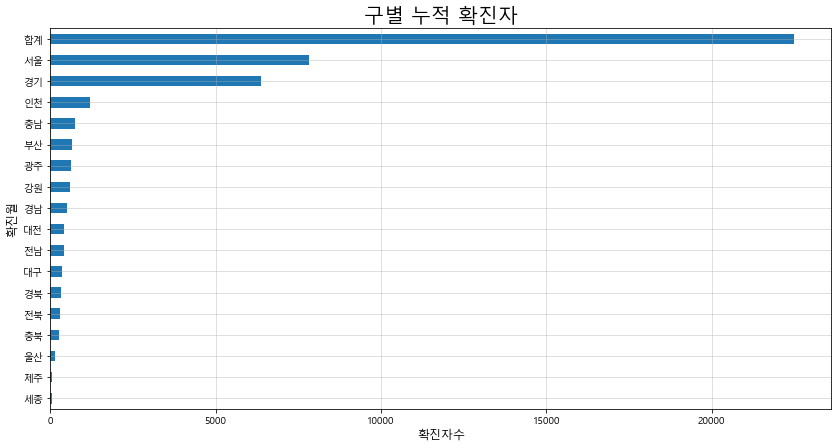

In [37]:
# 지역별 누적 확진자수
corona_moT['합계'].sort_values().plot(kind='barh', figsize=(14,7))
plt.ylabel('확진월', fontsize=12)
plt.xlabel('확진자수', fontsize=12)
plt.title('구별 누적 확진자', fontsize=20)
plt.grid(True, alpha=0.5)
plt.show()

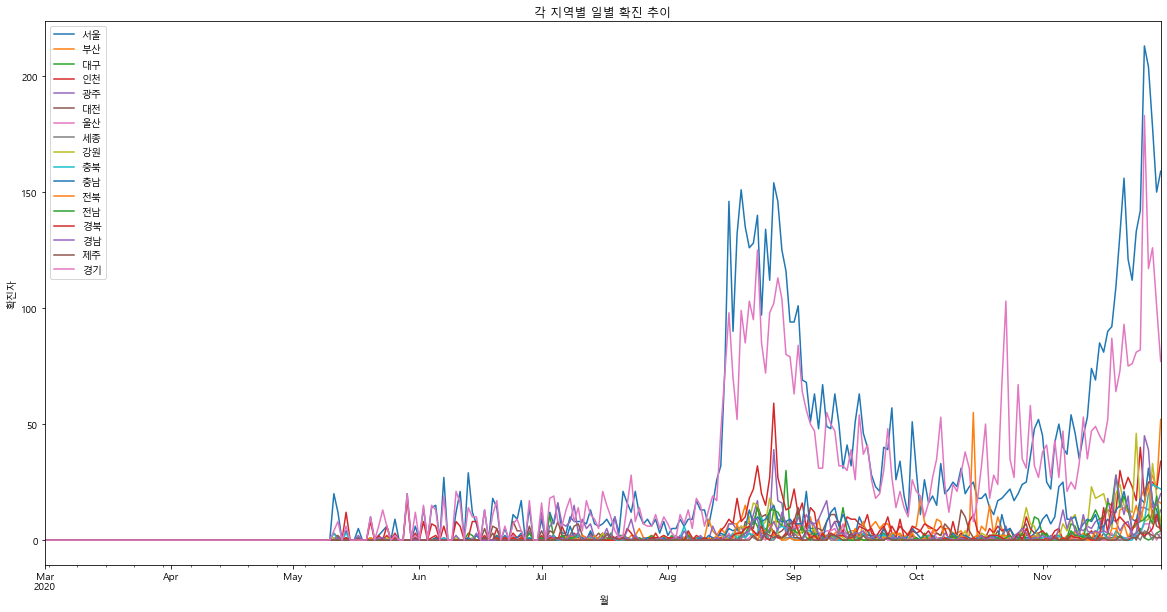

In [38]:
# 한 번 보고싶어 만든 각 지역별 일별 확진 추이
coron_sumX.plot(figsize=(20,10))
plt.title("각 지역별 일별 확진 추이")
plt.xlabel("월")
plt.ylabel("확진자")
plt.show()

### 지역 인구 데이터와 합치기

In [39]:
pop = pd.read_csv('./data/인구소멸.csv')
pop.head()

,Unnamed: 0,광역시도,시군구,행정구,20~39세여자,20~39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID
0,0,강원,강릉시,,20993,46008,40497,101154,101903,203057,1.036768,False,강릉
1,1,강원,고성군,,1699,4006,7005,11933,11688,23621,0.485082,True,고성(강원)
2,2,강원,동해시,,7510,16311,16152,42093,41795,83888,0.929916,True,동해
3,3,강원,삼척시,,5280,12428,14953,31630,30203,61833,0.706213,True,삼척
4,4,강원,속초시,,7411,15928,14010,37488,38814,76302,1.057959,False,속초


In [40]:
pop = pop[['광역시도', '시군구', '인구수합계']]
pop.head()

,광역시도,시군구,인구수합계
0,강원,강릉시,203057
1,강원,고성군,23621
2,강원,동해시,83888
3,강원,삼척시,61833
4,강원,속초시,76302


In [41]:
pop_pt = pd.pivot_table(pop, index='광역시도', values='인구수합계', aggfunc='sum')
pop_pt

,인구수합계
광역시도,
강원,1428480
경기,12437493
경남,3141767
경북,2477500
광주,1409750
대구,2332499
대전,1420059
부산,3222121
서울,9096901


In [42]:
corona_pop = pd.concat([corona_moT, pop_pt], axis=1)
corona_pop

,3월,4월,5월,6월,7월,8월,9월,10월,11월,합계,인구수합계
서울,0,0,98,252,275,2267,1424,719,2794,7829,9096901.0
부산,0,0,1,4,17,130,120,171,217,660,3222121.0
대구,0,0,6,13,31,107,85,42,58,342,2332499.0
인천,0,0,51,72,42,335,200,129,366,1195,2799553.0
광주,0,0,0,4,138,170,121,16,185,634,1409750.0
대전,0,0,5,38,48,90,105,82,52,420,1420059.0
울산,0,0,3,3,4,30,58,16,35,149,1083587.0
세종,0,0,1,0,0,17,9,6,18,51,321495.0
강원,0,0,3,4,9,115,35,55,373,594,1428480.0
충북,0,0,7,2,9,55,43,18,139,273,1508987.0


In [43]:
corona_pop = corona_pop.drop(index='합계', axis=1)
corona_pop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 서울 to 경기
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   3월      17 non-null     int32  
 1   4월      17 non-null     int32  
 2   5월      17 non-null     int32  
 3   6월      17 non-null     int32  
 4   7월      17 non-null     int32  
 5   8월      17 non-null     int32  
 6   9월      17 non-null     int32  
 7   10월     17 non-null     int32  
 8   11월     17 non-null     int32  
 9   합계      17 non-null     int64  
 10  인구수합계   17 non-null     float64
dtypes: float64(1), int32(9), int64(1)
memory usage: 1020.0+ bytes


In [44]:
corona_pop = corona_pop.astype(int)
corona_pop.head()

,3월,4월,5월,6월,7월,8월,9월,10월,11월,합계,인구수합계
서울,0,0,98,252,275,2267,1424,719,2794,7829,9096901
부산,0,0,1,4,17,130,120,171,217,660,3222121
대구,0,0,6,13,31,107,85,42,58,342,2332499
인천,0,0,51,72,42,335,200,129,366,1195,2799553
광주,0,0,0,4,138,170,121,16,185,634,1409750


In [45]:
corona_pop['십만명당 확진자 수'] = corona_pop['합계'] / corona_pop['인구수합계'] * 100000
corona_pop.head()

,3월,4월,5월,6월,7월,8월,9월,10월,11월,합계,인구수합계,십만명당 확진자 수
서울,0,0,98,252,275,2267,1424,719,2794,7829,9096901,86.062275
부산,0,0,1,4,17,130,120,171,217,660,3222121,20.483402
대구,0,0,6,13,31,107,85,42,58,342,2332499,14.662386
인천,0,0,51,72,42,335,200,129,366,1195,2799553,42.685386
광주,0,0,0,4,138,170,121,16,185,634,1409750,44.972513


#### 십만명당 확진자 수 그래프

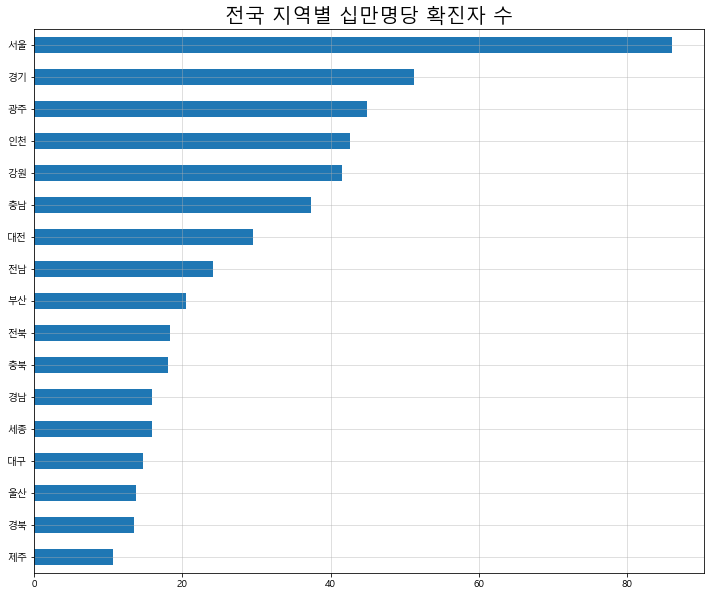

In [46]:
corona_pop['십만명당 확진자 수'].sort_values().plot(kind='barh', rot=0, figsize=(12,10), legend=False)
plt.title("전국 지역별 십만명당 확진자 수", fontsize=20)
plt.grid(True, alpha=0.5)
plt.show()

### 지도로 표시

In [47]:
import folium

In [48]:
folium_corona = corona_pop.copy()
folium_corona.head()

,3월,4월,5월,6월,7월,8월,9월,10월,11월,합계,인구수합계,십만명당 확진자 수
서울,0,0,98,252,275,2267,1424,719,2794,7829,9096901,86.062275
부산,0,0,1,4,17,130,120,171,217,660,3222121,20.483402
대구,0,0,6,13,31,107,85,42,58,342,2332499,14.662386
인천,0,0,51,72,42,335,200,129,366,1195,2799553,42.685386
광주,0,0,0,4,138,170,121,16,185,634,1409750,44.972513


In [49]:
# 시청/도청을 통하여 위도와 경도 받아오기

addr = []
for i in folium_corona.index:
    if i in ['서울','부산','대구','인천','대전','울산','세종','제주']:
        addr.append(f"{i}시청")
    elif i in ['광주']:
        addr.append(f"{i}광역시청")
    elif i in [ '강원', '충북', '충남', '전북', '전남', '경북', '경남', '경기']:
        addr.append(f"{i}도청")
folium_corona['시청'] = addr
folium_corona.head()

,3월,4월,5월,6월,7월,8월,9월,10월,11월,합계,인구수합계,십만명당 확진자 수,시청
서울,0,0,98,252,275,2267,1424,719,2794,7829,9096901,86.062275,서울시청
부산,0,0,1,4,17,130,120,171,217,660,3222121,20.483402,부산시청
대구,0,0,6,13,31,107,85,42,58,342,2332499,14.662386,대구시청
인천,0,0,51,72,42,335,200,129,366,1195,2799553,42.685386,인천시청
광주,0,0,0,4,138,170,121,16,185,634,1409750,44.972513,광주광역시청


In [50]:
key_fd = open('./data/kakaomapkey.txt', mode='r')
kmap_key = key_fd.read(100)
key_fd.close()

In [51]:
addr = '제주시청'
url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query=' + quote(addr)
result = requests.get(url,headers={'Authorization': "KakaoAK "+kmap_key}).json()
result['documents'][0]

{'address_name': '제주특별자치도 제주시 이도2동 1176-1',
 'category_group_code': 'PO3',
 'category_group_name': '공공기관',
 'category_name': '사회,공공기관 > 지방행정기관 > 시청',
 'distance': '',
 'id': '8064058',
 'phone': '064-120',
 'place_name': '제주시청',
 'place_url': 'http://place.map.kakao.com/8064058',
 'road_address_name': '제주특별자치도 제주시 광양9길 10',
 'x': '126.531171087129',
 'y': '33.4995342412698'}

In [52]:
lat_list = []; lng_list = []
for i in folium_corona.index:
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query=' + quote(folium_corona['시청'][i])
    result = requests.get(url, headers={"Authorization": "KakaoAK "+kmap_key}).json()
    lat_list.append(float(result['documents'][0]['y']))
    lng_list.append(float(result['documents'][0]['x']))

folium_corona['lat'] = lat_list
folium_corona['lng'] = lng_list

In [53]:
folium_corona.head()

,3월,4월,5월,6월,7월,8월,9월,10월,11월,합계,인구수합계,십만명당 확진자 수,시청,lat,lng
서울,0,0,98,252,275,2267,1424,719,2794,7829,9096901,86.062275,서울시청,37.566824,126.978652
부산,0,0,1,4,17,130,120,171,217,660,3222121,20.483402,부산시청,35.179737,129.075068
대구,0,0,6,13,31,107,85,42,58,342,2332499,14.662386,대구시청,35.871380,128.601805
인천,0,0,51,72,42,335,200,129,366,1195,2799553,42.685386,인천시청,37.456004,126.705258
광주,0,0,0,4,138,170,121,16,185,634,1409750,44.972513,광주광역시청,35.160102,126.851630


In [54]:
# 십만명당 확진자 수 지도로 표시
mapping = folium.Map(location=[folium_corona.lat.mean(), folium_corona.lng.mean()], zoom_start=7)

for i in folium_corona.index:
    folium.CircleMarker(     
            location=[folium_corona.lat[i], folium_corona.lng[i]],
            radius=folium_corona['십만명당 확진자 수'][i] / 2,
            tooltip=i,
            color='#8282FF',
            fill=True,
            fill_color='#8282FF'
        ).add_to(mapping)
mapping